In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set(style="darkgrid")

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('veris_premodel.csv')

In [3]:
df.head()

,state,industry,n_employees,incident_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,actor
0,GA,education,4.0,2017,confidentiality,alter behavior,3.0,yes,social,phishing,email,law enforcement,server,mail,0.0,6.0,NaN,NaN,NaN,0
1,PA,healthcare,NaN,2018,confidentiality,data loss,1.0,yes,misuse,knowledge abuse,physical access,NaN,server,database,0.0,4.0,NaN,0.0,2.0,0
2,NE,finance and insurance,6.0,2017,confidentiality,data loss,2.0,yes,physical,skimmer,victim public area,customer,terminal,atm,0.0,NaN,NaN,NaN,NaN,0
3,OH,government,3.0,2015,confidentiality,data loss,NaN,yes,error,omission,NaN,customer,media,disk media,0.0,NaN,NaN,NaN,NaN,0
4,NaN,retail trade,1.0,2017,integrity,hardware tampering,3.0,yes,physical,skimmer,victim public area,customer,terminal,gas terminal,0.0,2.0,NaN,NaN,2.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1604 non-null   object 
 1   industry               1806 non-null   object 
 2   n_employees            1372 non-null   float64
 3   incident_year          1806 non-null   int64  
 4   attribute              1806 non-null   object 
 5   compromise             1797 non-null   object 
 6   confidence             745 non-null    float64
 7   data_disclosure        1766 non-null   object 
 8   action                 1800 non-null   object 
 9   action_variety         1543 non-null   object 
 10  action_vector          1448 non-null   object 
 11  discovery_variety      1020 non-null   object 
 12  asset_group            1806 non-null   object 
 13  asset_variety          1806 non-null   object 
 14  availability_duration  1655 non-null   float64
 15  disc

In [5]:
df['incident_year']=df['incident_year'].astype('object')

In [6]:
df.shape

(1806, 20)

In [7]:
ef=df[['state','actor']]

In [8]:
ef[ef['actor']==1].count()

state    36
actor    51
dtype: int64

In [9]:
def missing_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_table(df)

Your selected dataframe has 20 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
exfiltration,1568,86.8
containment,1549,85.8
time_compromise,1446,80.1
discovery,1248,69.1
confidence,1061,58.7
discovery_variety,786,43.5
n_employees,434,24.0
action_vector,358,19.8
action_variety,263,14.6
state,202,11.2


In [11]:

frequencies = df.state.value_counts(normalize=True, ascending=True)
threshold = frequencies[(frequencies.cumsum() > 0.01).idxmax()]
frequencies

SD    0.001247
ND    0.001870
RI    0.001870
NV    0.001870
HI    0.002494
ID    0.002494
VT    0.003117
AR    0.003117
NH    0.003117
ME    0.003117
WY    0.003741
DE    0.004364
MT    0.004988
NE    0.004988
OK    0.005611
MS    0.006234
WV    0.006234
KS    0.006858
IA    0.007481
AK    0.007481
UT    0.008105
LA    0.008105
KY    0.008105
NM    0.008728
SC    0.009352
AZ    0.010599
WI    0.010599
OR    0.012469
CT    0.016209
CO    0.017456
NC    0.017456
IN    0.017456
MO    0.019950
TN    0.021197
MN    0.021197
AL    0.021197
MD    0.022444
MI    0.022444
MA    0.023067
WA    0.023691
NJ    0.023691
DC    0.025561
OH    0.029302
GA    0.031172
IL    0.035536
VA    0.039277
PA    0.040524
TX    0.051746
NY    0.081047
FL    0.084788
CA    0.155237
Name: state, dtype: float64

In [12]:

round(threshold,4)

0.0025

In [13]:
cols=df.keys()
freq=[]

for col in cols:
    freq.append(df[col].value_counts(normalize=True, ascending=True))
    pd.DataFrame(freq)
freq

[SD    0.001247
 ND    0.001870
 RI    0.001870
 NV    0.001870
 HI    0.002494
 ID    0.002494
 VT    0.003117
 AR    0.003117
 NH    0.003117
 ME    0.003117
 WY    0.003741
 DE    0.004364
 MT    0.004988
 NE    0.004988
 OK    0.005611
 MS    0.006234
 WV    0.006234
 KS    0.006858
 IA    0.007481
 AK    0.007481
 UT    0.008105
 LA    0.008105
 KY    0.008105
 NM    0.008728
 SC    0.009352
 AZ    0.010599
 WI    0.010599
 OR    0.012469
 CT    0.016209
 CO    0.017456
 NC    0.017456
 IN    0.017456
 MO    0.019950
 TN    0.021197
 MN    0.021197
 AL    0.021197
 MD    0.022444
 MI    0.022444
 MA    0.023067
 WA    0.023691
 NJ    0.023691
 DC    0.025561
 OH    0.029302
 GA    0.031172
 IL    0.035536
 VA    0.039277
 PA    0.040524
 TX    0.051746
 NY    0.081047
 FL    0.084788
 CA    0.155237
 Name: state, dtype: float64,
 agriculture & animal     0.001107
 consultation/service     0.001107
 utilities                0.001661
 information/ app         0.003322
 mining       

In [14]:
freq1=df.action_variety.value_counts(normalize=True, ascending=True)
threshold1 = frequencies[(frequencies.cumsum() > 0.05).idxmax()]
freq1.head(10)

email attachment        0.000648
net misuse              0.000648
illicit content         0.000648
cache poisoning         0.000648
export data             0.000648
footprinting            0.000648
destroy data            0.000648
inadequate processes    0.000648
flood                   0.000648
xss                     0.000648
Name: action_variety, dtype: float64

In [15]:
threshold1

0.006234413965087282

In [16]:
freq2=df.action_vector.value_counts(normalize=True, ascending=True)
threshold2 = frequencies[(frequencies.cumsum() > 0.05).idxmax()]
freq2.head(10)

command shell               0.000691
visitor privileges          0.000691
network propagation         0.000691
humidity                    0.000691
partner vehicle             0.000691
software update             0.000691
desktop sharing software    0.001381
uncontrolled location       0.001381
removable media             0.001381
desktop sharing             0.001381
Name: action_vector, dtype: float64

## Dealing  Missing and Rare Values

In [17]:
df_im=df.copy()

In [18]:
df_im['state'].fillna('Other', inplace=True)

In [19]:
df_im['state'].mask(df_im['state'].map(frequencies)< threshold, 'Other', inplace=True)

In [20]:
df_im.state.value_counts()

CA       249
Other    213
FL       136
NY       130
TX        83
PA        65
VA        63
IL        57
GA        50
OH        47
DC        41
NJ        38
WA        38
MA        37
MD        36
MI        36
AL        34
MN        34
TN        34
MO        32
IN        28
CO        28
NC        28
CT        26
OR        20
WI        17
AZ        17
SC        15
NM        14
LA        13
KY        13
UT        13
AK        12
IA        12
KS        11
WV        10
MS        10
OK         9
MT         8
NE         8
DE         7
WY         6
NH         5
VT         5
ME         5
AR         5
ID         4
HI         4
Name: state, dtype: int64

In [21]:
df_im['action_variety'].mask(df_im['action_variety'].map(freq1)<threshold1, 'other', inplace=True)

In [22]:
df_im['action_vector'].mask(df_im['action_vector'].map(freq2)<threshold2, 'other', inplace=True)

In [23]:
df_im.compromise.fillna('other', inplace=True)

In [24]:
df_im.action.value_counts()

misuse         621
hacking        397
error          323
physical       275
malware        120
social          63
environment      1
Name: action, dtype: int64

In [25]:
missing_table(df_im)

Your selected dataframe has 20 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
exfiltration,1568,86.8
containment,1549,85.8
time_compromise,1446,80.1
discovery,1248,69.1
confidence,1061,58.7
discovery_variety,786,43.5
n_employees,434,24.0
action_vector,358,19.8
action_variety,263,14.6
availability_duration,151,8.4


In [26]:
df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1806 non-null   object 
 1   industry               1806 non-null   object 
 2   n_employees            1372 non-null   float64
 3   incident_year          1806 non-null   object 
 4   attribute              1806 non-null   object 
 5   compromise             1806 non-null   object 
 6   confidence             745 non-null    float64
 7   data_disclosure        1766 non-null   object 
 8   action                 1800 non-null   object 
 9   action_variety         1543 non-null   object 
 10  action_vector          1448 non-null   object 
 11  discovery_variety      1020 non-null   object 
 12  asset_group            1806 non-null   object 
 13  asset_variety          1806 non-null   object 
 14  availability_duration  1655 non-null   float64
 15  disc

In [27]:
df_int=df_im.copy()

In [28]:
missing_table(df_int)

Your selected dataframe has 20 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
exfiltration,1568,86.8
containment,1549,85.8
time_compromise,1446,80.1
discovery,1248,69.1
confidence,1061,58.7
discovery_variety,786,43.5
n_employees,434,24.0
action_vector,358,19.8
action_variety,263,14.6
availability_duration,151,8.4


In [29]:
cols=['action','action_variety','action_vector','discovery_variety']


df_int['action']=df_int['action'].fillna('other')
df_int['action_variety']=df_int['action_variety'].fillna('other')
df_int['action_vector']=df_int['action_vector'].fillna('other')
df_int['discovery_variety']=df_int['discovery_variety'].fillna('other')

In [30]:
missing_table(df_int)

Your selected dataframe has 20 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
exfiltration,1568,86.8
containment,1549,85.8
time_compromise,1446,80.1
discovery,1248,69.1
confidence,1061,58.7
n_employees,434,24.0
availability_duration,151,8.4
data_disclosure,40,2.2


In [31]:
df_int.head()

,state,industry,n_employees,incident_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,actor
0,GA,education,4.0,2017,confidentiality,alter behavior,3.0,yes,social,phishing,email,law enforcement,server,mail,0.0,6.0,NaN,NaN,NaN,0
1,PA,healthcare,NaN,2018,confidentiality,data loss,1.0,yes,misuse,knowledge abuse,physical access,other,server,database,0.0,4.0,NaN,0.0,2.0,0
2,NE,finance and insurance,6.0,2017,confidentiality,data loss,2.0,yes,physical,skimmer,victim public area,customer,terminal,atm,0.0,NaN,NaN,NaN,NaN,0
3,OH,government,3.0,2015,confidentiality,data loss,NaN,yes,error,other,other,customer,media,disk media,0.0,NaN,NaN,NaN,NaN,0
4,Other,retail trade,1.0,2017,integrity,hardware tampering,3.0,yes,physical,skimmer,victim public area,customer,terminal,gas terminal,0.0,2.0,NaN,NaN,2.0,0


In [32]:
df_int['n_employees'].interpolate(method='pad', limit=6, limit_direction='both', inplace=True)

In [33]:
df_int['confidence'].interpolate(method='pad', limit=12, limit_direction='both', inplace=True)

In [34]:
df_int['availability_duration'].interpolate(method='pad', limit=6, limit_direction='both', inplace=True)

In [35]:
df_int['data_disclosure'].interpolate(method='pad', limit=6, limit_direction='both', inplace=True)

In [36]:
df_int['containment'].fillna(-999, inplace=True)

In [37]:
df_int['exfiltration'].fillna(-999, inplace=True)

In [38]:
df_int['time_compromise'].fillna(-999, inplace=True)

In [39]:
df_int['discovery'].fillna(-999, inplace=True)

In [40]:
missing_table(df_int)

Your selected dataframe has 20 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
confidence,20,1.1


In [41]:
df_int['confidence'].interpolate(method='pad', limit=12, limit_direction='both', inplace=True)

In [42]:
missing_table(df_int)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [43]:
df_int.head()

,state,industry,n_employees,incident_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,actor
0,GA,education,4.0,2017,confidentiality,alter behavior,3.0,yes,social,phishing,email,law enforcement,server,mail,0.0,6.0,-999.0,-999.0,-999.0,0
1,PA,healthcare,4.0,2018,confidentiality,data loss,1.0,yes,misuse,knowledge abuse,physical access,other,server,database,0.0,4.0,-999.0,0.0,2.0,0
2,NE,finance and insurance,6.0,2017,confidentiality,data loss,2.0,yes,physical,skimmer,victim public area,customer,terminal,atm,0.0,-999.0,-999.0,-999.0,-999.0,0
3,OH,government,3.0,2015,confidentiality,data loss,2.0,yes,error,other,other,customer,media,disk media,0.0,-999.0,-999.0,-999.0,-999.0,0
4,Other,retail trade,1.0,2017,integrity,hardware tampering,3.0,yes,physical,skimmer,victim public area,customer,terminal,gas terminal,0.0,2.0,-999.0,-999.0,2.0,0


In [44]:
df_int['incident_year']=df_int.incident_year.astype('object')

df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1806 non-null   object 
 1   industry               1806 non-null   object 
 2   n_employees            1806 non-null   float64
 3   incident_year          1806 non-null   object 
 4   attribute              1806 non-null   object 
 5   compromise             1806 non-null   object 
 6   confidence             1806 non-null   float64
 7   data_disclosure        1806 non-null   object 
 8   action                 1806 non-null   object 
 9   action_variety         1806 non-null   object 
 10  action_vector          1806 non-null   object 
 11  discovery_variety      1806 non-null   object 
 12  asset_group            1806 non-null   object 
 13  asset_variety          1806 non-null   object 
 14  availability_duration  1806 non-null   float64
 15  disc

In [45]:
df_dum=pd.get_dummies(df_int)

In [46]:
df_dum.shape

(1806, 255)

In [47]:
X=df_dum.drop(columns='actor')
y=df_dum.actor

In [48]:
np.isnan(X).sum().sort_values(ascending=False)

asset_variety_ wlan               0
incident_year_2004                0
incident_year_2017                0
incident_year_2016                0
incident_year_2015                0
                                 ..
action_vector_physical access     0
action_vector_personal vehicle    0
action_vector_other               0
action_vector_non-corporate       0
n_employees                       0
Length: 254, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split


In [50]:
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,precision_score,classification_report, confusion_matrix

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc=RandomForestClassifier()

In [54]:
rfc.fit(X_train_val, y_train_val)

RandomForestClassifier()

In [55]:
predictions=rfc.predict(X_val)

In [56]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_val, predictions))
conf_mat = confusion_matrix(y_val, predictions)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       349
           1       1.00      0.33      0.50        12

    accuracy                           0.98       361
   macro avg       0.99      0.67      0.74       361
weighted avg       0.98      0.98      0.97       361

Confusion matrix:
 [[349   0]
 [  8   4]]


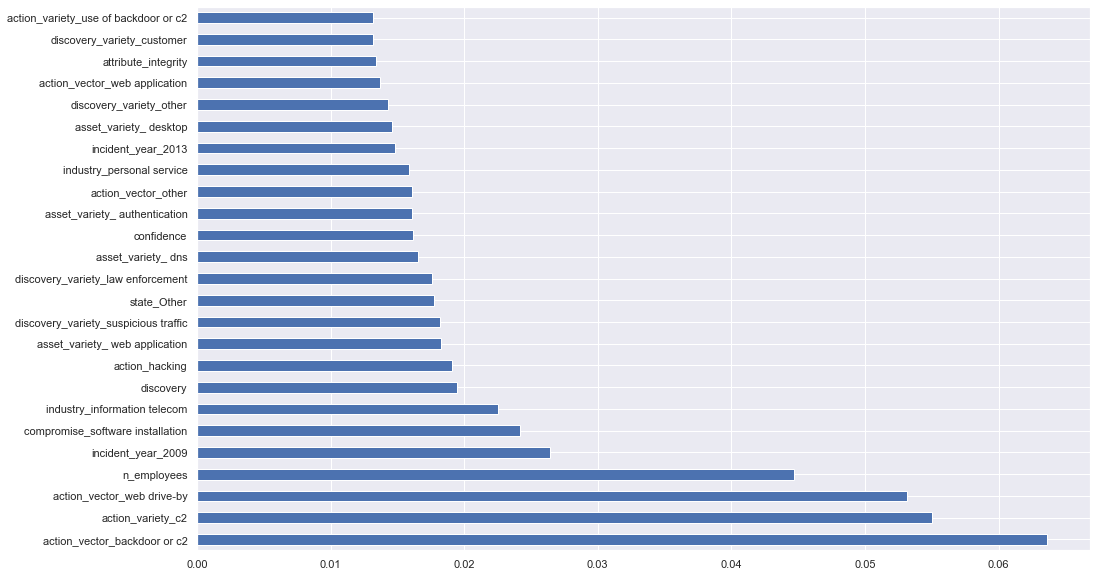

In [57]:
plt.figure(figsize=(16, 10))
feat_importances = pd.Series(rfc.feature_importances_, index=X_train_val.columns)
feat_importances.nlargest(25).plot(kind='barh')

In [58]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
predictions=rfc.predict(X_test)

In [60]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predictions))
conf_mat = confusion_matrix(y_test, predictions)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       352
           1       1.00      0.30      0.46        10

    accuracy                           0.98       362
   macro avg       0.99      0.65      0.73       362
weighted avg       0.98      0.98      0.98       362

Confusion matrix:
 [[352   0]
 [  7   3]]


## Resampling 

In [61]:
df_int.shape

(1806, 20)

In [63]:
df_new=df_int.drop(columns=['state'])

In [64]:
df_new=pd.get_dummies(df_new)

In [66]:
X=df_new.drop(columns='actor')
y=df_new.actor

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [446]:
from sklearn.metrics import f1_score,roc_curve, roc_auc_score,accuracy_score,precision_score,classification_report, confusion_matrix

## Random Under Sampler

In [70]:
from imblearn.under_sampling import RandomUnderSampler

In [71]:
rus=RandomUnderSampler(random_state=0)

In [72]:
X_rus, y_rus=rus.fit_sample(X_train_val,y_train_val)

In [73]:
y_ru=pd.DataFrame(y_rus)

In [74]:
y_ru['actor'].value_counts()

1    29
0    29
Name: actor, dtype: int64

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf=RandomForestClassifier()

In [77]:
rf.fit(X_rus, y_rus)

RandomForestClassifier()

In [78]:
prediction=rf.predict(X_val)

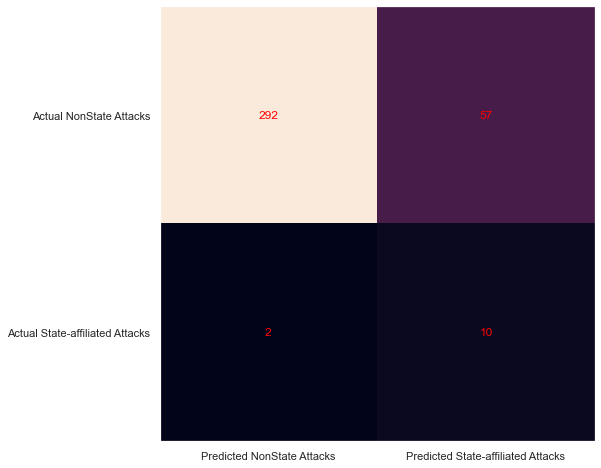

In [79]:
cm = confusion_matrix(y_val, prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NonState Attacks', 'Predicted State-affiliated Attacks'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NonState Attacks', 'Actual State-affiliated Attacks'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [80]:
print(classification_report(y_val,prediction))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       349
           1       0.15      0.83      0.25        12

    accuracy                           0.84       361
   macro avg       0.57      0.84      0.58       361
weighted avg       0.97      0.84      0.89       361



## Random Over Sampling

In [483]:
from imblearn.over_sampling import RandomOverSampler

In [484]:
ros=RandomOverSampler(random_state=0)

In [485]:
X_ros, y_ros=ros.fit_sample(X_train_val,y_train_val)

In [486]:
y_ro=pd.DataFrame(y_ros)

In [487]:
y_ro['actor'].value_counts()

1    1054
0    1054
Name: actor, dtype: int64

In [488]:
rf=RandomForestClassifier()

In [489]:
rf.fit(X_ros, y_ros)

RandomForestClassifier()

In [490]:
prediction=rf.predict(X_val)

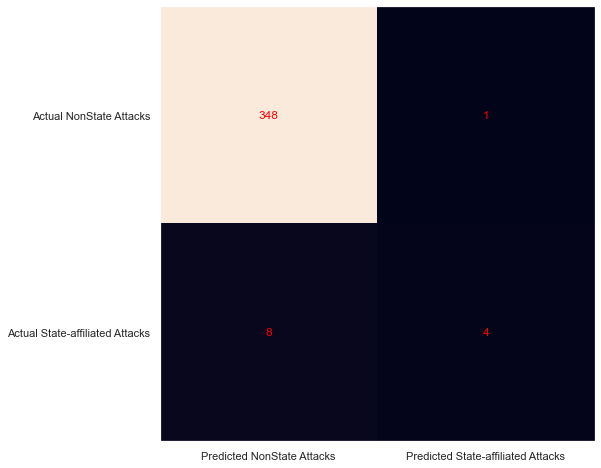

In [491]:
cm = confusion_matrix(y_val, prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NonState Attacks', 'Predicted State-affiliated Attacks'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NonState Attacks', 'Actual State-affiliated Attacks'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [492]:
print(classification_report(y_val,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       349
           1       0.80      0.33      0.47        12

    accuracy                           0.98       361
   macro avg       0.89      0.67      0.73       361
weighted avg       0.97      0.98      0.97       361



In [476]:
X_ros, y_ros=ros.fit_sample(X_train,y_train)

In [477]:
rf.fit(X_ros, y_ros)

RandomForestClassifier()

In [478]:
prediction=rf.predict(X_test)

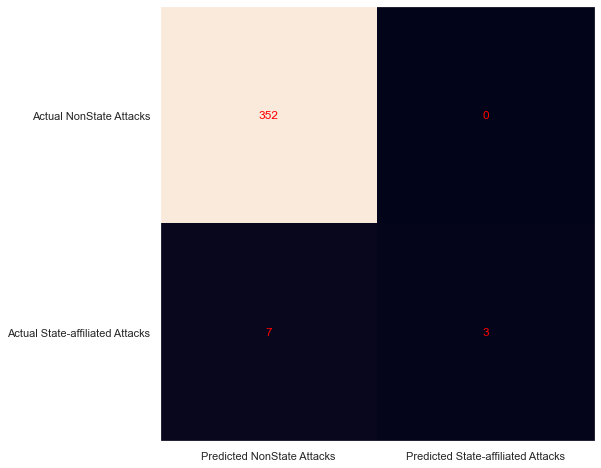

In [479]:
cm = confusion_matrix(y_test, prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NonState Attacks', 'Predicted State-affiliated Attacks'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NonState Attacks', 'Actual State-affiliated Attacks'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## SMOTE 

In [515]:
from imblearn.over_sampling import SMOTE

In [516]:
smote=SMOTE(random_state=42)

In [517]:
X_smote, y_smote=smote.fit_sample(X_train_val,y_train_val)

In [518]:
y_sm=pd.DataFrame(y_smote)

In [519]:
y_sm['actor'].value_counts()

1    1054
0    1054
Name: actor, dtype: int64

In [520]:
rf.fit(X_smote, y_smote)

RandomForestClassifier()

In [525]:
prediction=rf.predict(X_val)

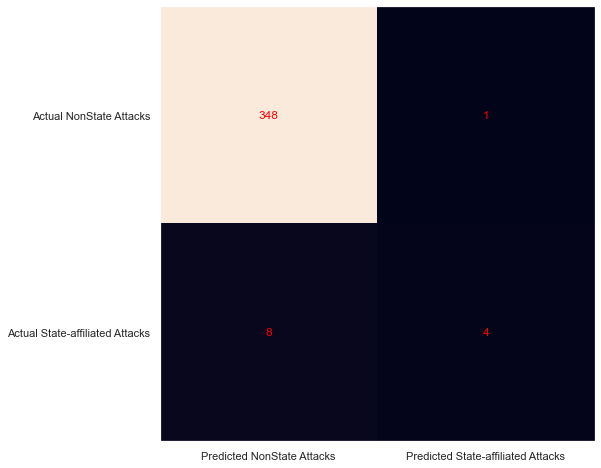

In [526]:
cm = confusion_matrix(y_val, prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NonState Attacks', 'Predicted State-affiliated Attacks'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NonState Attacks', 'Actual State-affiliated Attacks'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [527]:
print(classification_report(y_val,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       349
           1       0.80      0.33      0.47        12

    accuracy                           0.98       361
   macro avg       0.89      0.67      0.73       361
weighted avg       0.97      0.98      0.97       361



In [501]:
rf=RandomForestClassifier()

In [502]:
X_smote, y_smote=smote.fit_sample(X_train,y_train)

In [503]:
rf.fit(X_smote, y_smote)

RandomForestClassifier()

In [504]:
prediction=rf.predict(X_test)

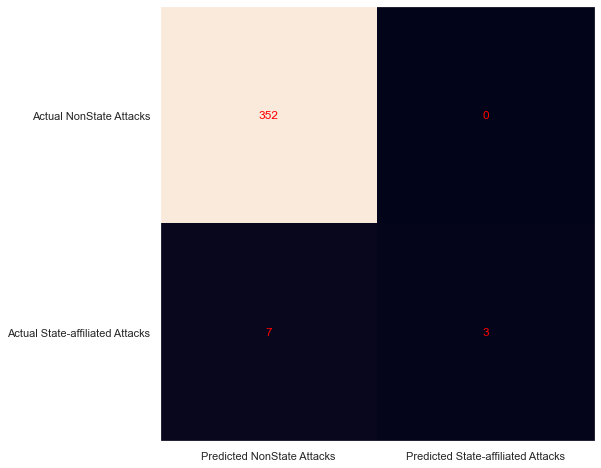

In [505]:
cm = confusion_matrix(y_test, prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NonState Attacks', 'Predicted State-affiliated Attacks'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NonState Attacks', 'Actual State-affiliated Attacks'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## ADASYN

In [566]:
from imblearn.over_sampling import ADASYN

In [567]:
ada=ADASYN(random_state=0, n_neighbors=8)

In [568]:
X_ada, y_ada=ada.fit_sample(X_train_val, y_train_val)

In [569]:
rf=RandomForestClassifier(random_state=51,max_depth=16, n_estimators=400, max_features='log2')

In [570]:
rf.fit(X_ada, y_ada)

RandomForestClassifier(max_depth=16, max_features='log2', n_estimators=400,
                       random_state=51)

In [571]:
prediction=rf.predict(X_val)

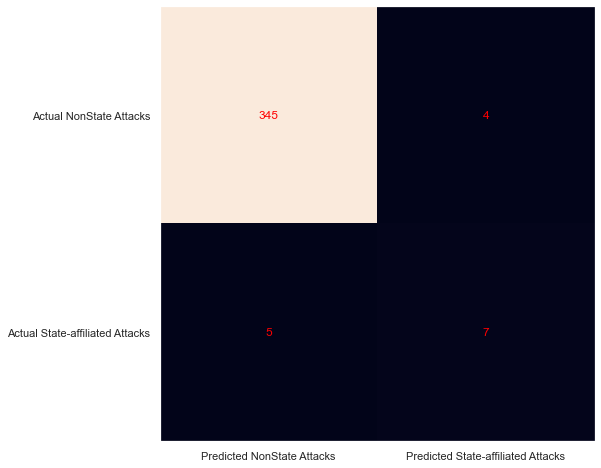

In [572]:
cm = confusion_matrix(y_val, prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NonState Attacks', 'Predicted State-affiliated Attacks'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NonState Attacks', 'Actual State-affiliated Attacks'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [574]:
print(classification_report(y_val,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       349
           1       0.64      0.58      0.61        12

    accuracy                           0.98       361
   macro avg       0.81      0.79      0.80       361
weighted avg       0.97      0.98      0.97       361



In [576]:
prob=final_model.predict_proba(X_val)[:,1]

In [577]:
fpr, tpr, thresholds  = roc_curve(y_val, prob) #Get the ROC Curve
roc_auc_score(y_val, prob)

0.9395893027698186

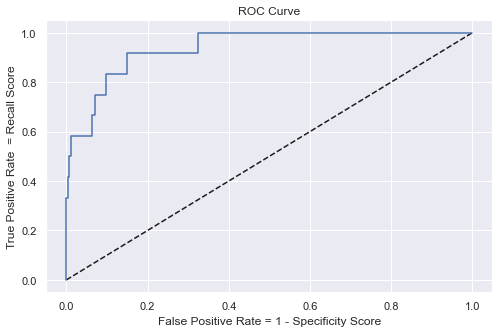

In [578]:
plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve')
plt.show()

In [579]:
threshold=arange(0,1,0.001)

In [581]:
scores=[f1_score(y_val, to_label(prob,t)) for t in threshold]

In [582]:
ix=argmax(scores)

In [586]:
print('Threshold=%.3f, F-Score=%.5f' % (threshold[ix], scores[ix]))

Threshold=0.646, F-Score=0.60000


In [588]:
def adjusted_classes(prob, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in prob]

def precision_recall_threshold(fpr, tpr, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(prob, t)
    print(pd.DataFrame(confusion_matrix(y_val, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(tpr, fpr, color='b', alpha=0.2,
             where='post')
    plt.fill_between(tpr, fpr, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.05, 1.01]);
    plt.xlim([0.05, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(tpr[close_default_clf], fpr[close_default_clf], '^', c='k',
            markersize=15)

     pred_neg  pred_pos
neg       346         3
pos         6         6


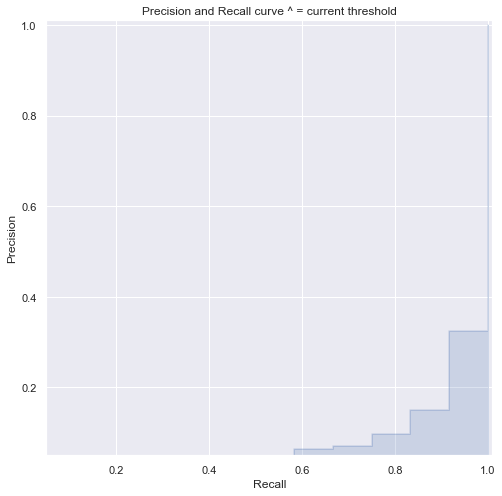

In [611]:
precision_recall_threshold(fpr, tpr, thresholds, t=0.60)

In [536]:
X_adas, y_adas=ada.fit_sample(X_train, y_train)

In [537]:
rf=RandomForestClassifier(random_state=51,max_depth=15, n_estimators=300, max_features='sqrt')

In [538]:
rf.fit(X_adas, y_adas)

RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=300,
                       random_state=51)

In [539]:
prediction=rf.predict(X_test)

In [540]:

print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       352
           1       0.50      0.50      0.50        10

    accuracy                           0.97       362
   macro avg       0.74      0.74      0.74       362
weighted avg       0.97      0.97      0.97       362

[[347   5]
 [  5   5]]


### Hyperparameter Tuning with ADASYN sampling and Random Forest

In [541]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [542]:
X_ada, y_ada=ada.fit_sample(X_train_val, y_train_val)

In [543]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 51,
 'verbose': 0,
 'warm_start': False}


In [435]:
param_grid={'max_depth':[16],
            
            
            'max_features':['log2'],
            'min_samples_leaf':[6,10],
            'n_estimators':[400],
            'random_state':[51],
            'min_samples_split': [4,6]
            
           }

rf=RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

In [436]:
grid_search.fit(X_ada, y_ada)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [16], 'max_features': ['log2'],
                         'min_samples_leaf': [6, 10],
                         'min_samples_split': [4, 6], 'n_estimators': [400],
                         'random_state': [51]})

In [437]:
grid_search.best_params_

{'max_depth': 16,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'n_estimators': 400,
 'random_state': 51}

In [438]:
grid_search.best_estimator_


RandomForestClassifier(max_depth=16, max_features='log2', min_samples_leaf=6,
                       min_samples_split=4, n_estimators=400, random_state=51)

In [439]:

final_model=grid_search.best_estimator_

In [440]:
predictions=final_model.predict(X_val)


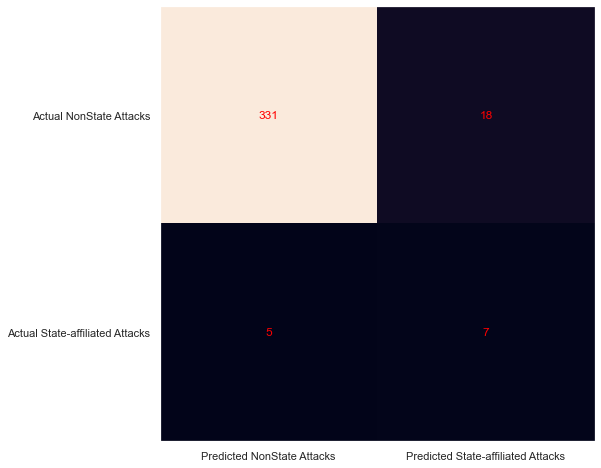

In [441]:
cm = confusion_matrix(y_val, predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NonState Attacks', 'Predicted State-affiliated Attacks'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NonState Attacks', 'Actual State-affiliated Attacks'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [442]:

predictions=final_model.predict(X_test)

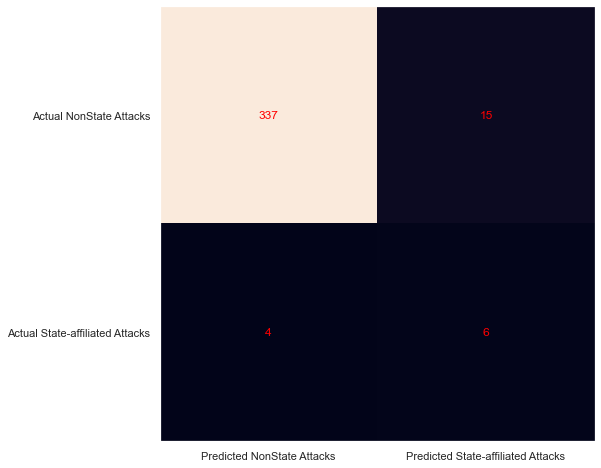

In [444]:
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NonState Attacks', 'Predicted State-affiliated Attacks'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NonState Attacks', 'Actual State-affiliated Attacks'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Determining optimal threshold

In [445]:
from numpy import arange
from numpy import argmax

In [447]:
def to_label(prob, threshold):
    return (prob >= threshold).astype('int')

In [556]:
prob=final_model.predict_proba(X_test)[:,1]

In [557]:
fpr, tpr, thresholds  = roc_curve(y_test, prob) #Get the ROC Curve
roc_auc_score(y_test, prob)

0.928409090909091

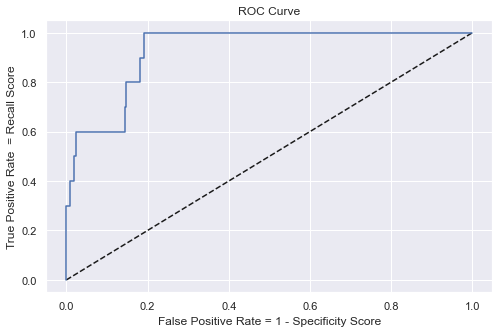

In [558]:
plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve')
plt.show()

In [559]:
def adjusted_classes(prob, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in prob]

def precision_recall_threshold(fpr, tpr, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(prob, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(tpr, fpr, color='b', alpha=0.2,
             where='post')
    plt.fill_between(tpr, fpr, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.05, 1.01]);
    plt.xlim([0.05, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(tpr[close_default_clf], fpr[close_default_clf], '^', c='k',
            markersize=15)

     pred_neg  pred_pos
neg       343         9
pos         4         6


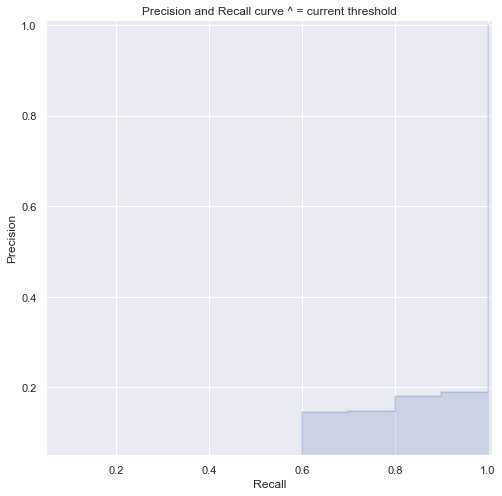

In [560]:
precision_recall_threshold(fpr, tpr, thresholds, t=0.54)

In [561]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(10,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.yticks(np.arange(0,1.1, 0.1))
    plt.xticks(np.arange(0,1.05, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

In [562]:
threshold=arange(0,1,0.001)

In [563]:
scores=[f1_score(y_test, to_label(prob,t)) for t in threshold]

In [564]:
ix=argmax(scores)

In [565]:
print('Threshold=%.3f, F-Score=%.5f' % (threshold[ix], scores[ix]))

Threshold=0.544, F-Score=0.50000
